In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

DIM = (176,176)

work_dr = IDG()

train_ds = train_datagen.flow_from_directory(
        "/kaggle/input/knee-oa-merged/Dataset_merged/train",
        seed=123,
        target_size=(176, 176),
        batch_size=64,
        class_mode='sparse'
        )

test_ds = test_datagen.flow_from_directory(
"/kaggle/input/knee-oa-merged/Dataset_merged/test",
seed=123,
target_size=(176, 176),
batch_size=64,
    class_mode='sparse'
)

val_ds = val_datagen.flow_from_directory(
"/kaggle/input/knee-oa-merged/Dataset_merged/val",
seed=123,
target_size=(176, 176),
batch_size=64,
class_mode='sparse'
)

Found 5778 images belonging to 3 classes.
Found 1656 images belonging to 3 classes.
Found 826 images belonging to 3 classes.


In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               restore_best_weights=True)

In [5]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = LearningRateScheduler(lr_scheduler)

## DenseNet169

*Thomas, Kevin A., et al. "Automated classification of radiographic knee osteoarthritis severity using deep neural networks." Radiology: Artificial Intelligence 2.2 (2020): e19006*

In [6]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

denseNet169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
denseNet169.trainable = True
denseNet169_model_new = models.Sequential()
denseNet169_model_new.add(denseNet169)
denseNet169_model_new.add(layers.GlobalAveragePooling2D())
denseNet169_model_new.add(layers.Dense(128, activation='relu',  kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
denseNet169_model_new.add(layers.Dropout(0.3))
denseNet169_model_new.add(layers.Dense(5, activation='softmax'))  

51877672/51877672 [==============================] - 2s 0us/step


In [ ]:
denseNet169_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [ ]:
denseNet169_new = denseNet169_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

In [ ]:
loss, accuracy = denseNet169_model_new.evaluate(test_ds)

## VGG16

*Alshamrani, Hassan A., et al. "Osteo-NeT: An Automated System for Predicting Knee Osteoarthritis from X-ray Images Using Transfer-Learning-Based Neural Networks Approach." Healthcare. Vol. 11. No. 9. MDPI, 2023.*

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
vgg16.trainable = True
vgg16_model_new = models.Sequential()
vgg16_model_new.add(vgg16)
vgg16_model_new.add(layers.GlobalAveragePooling2D())
vgg16_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
vgg16_model_new.add(layers.Dropout(0.3))
vgg16_model_new.add(layers.Dense(5, activation='softmax'))  

In [ ]:
vgg16_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [ ]:
vgg16_new = vgg16_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

In [ ]:
loss, accuracy = vgg16_model_new.evaluate(test_ds)

## ResNet101

*Mohammed, Abdul Sami, et al. "Knee Osteoarthritis Detection and Severity Classification Using Residual Neural Networks on Preprocessed X-ray Images." Diagnostics 13.8 (2023): 1380.*

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
resnet101.trainable = True
resnet101_model_new = models.Sequential()
resnet101_model_new.add(resnet101)
resnet101_model_new.add(layers.GlobalAveragePooling2D())
resnet101_model_new.add(layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
resnet101_model_new.add(layers.Dropout(0.3))
resnet101_model_new.add(layers.Dense(5, activation='softmax'))  

In [ ]:
resnet101_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [ ]:
resnet101_new = resnet101_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

In [ ]:
loss, accuracy = resnet101_model_new.evaluate(test_ds)

## VGG19

*Chen, Pingjun, et al. "Fully automatic knee osteoarthritis severity grading using deep neural networks with a novel ordinal loss." Computerized Medical Imaging and Graphics 75 (2019): 84-92.*

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
vgg19.trainable = True
vgg19_model_new = models.Sequential()
vgg19_model_new.add(vgg19)
vgg19_model_new.add(layers.GlobalAveragePooling2D())
vgg19_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
vgg19_model_new.add(layers.Dropout(0.3))
vgg19_model_new.add(layers.Dense(5, activation='softmax'))  

In [ ]:
vgg19_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [ ]:
vgg19_new = vgg19_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

In [ ]:
loss, accuracy = vgg19_model_new.evaluate(test_ds)

## KNN HOG CNN Model

*Mahum, Rabbia, et al. "A novel hybrid approach based on deep cnn features to detect knee osteoarthritis." Sensors 21.18 (2021): 6189.*

In [ ]:
from keras import activations
from keras import models, layers

cnn = models.Sequential()
cnn.add(layers.Conv2D(20, (5, 5), strides=1, activation='relu', input_shape=(176, 176, 1)))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2), strides=1))
cnn.add(layers.Conv2D(32, (3, 3), strides=1, activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2), strides=1))
cnn.add(layers.Conv2D(40, (3, 3), strides=1, activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2), strides=1))
cnn.add(layers.Activation(activations.relu))
cnn.add(layers.Softmax(axis=-1))

#### For train dataset

In [ ]:
batch_images_train, batch_labels_train = train_ds.next()

In [ ]:
gray_images_train = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in batch_images_train])

In [ ]:
cnn_output_train = cnn.predict(gray_images_train.reshape(-1, 176, 176, 1))

In [ ]:
cnn_output_gray_train = np.mean(cnn_output_train, axis=3)

In [ ]:
from scipy.spatial.qhull import QhullError
from scipy import spatial
spatial.QhullError = QhullError

In [ ]:
from skimage import color, feature

hog_features_train = np.array([feature.hog(img.squeeze()) for img in cnn_output_gray_train])

In [ ]:
cnn_output_gray_train.shape

In [ ]:
hog_features_train.shape

#### For test dataset

In [ ]:
batch_images_test, batch_labels_test = test_ds.next()

In [ ]:
gray_images_test = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in batch_images_test])

In [ ]:
cnn_output_test = cnn.predict(gray_images_test.reshape(-1, 176, 176, 1))

In [ ]:
cnn_output_gray_test = np.mean(cnn_output_test, axis=3)

In [ ]:
cnn_output_gray_test.shape

In [ ]:
from skimage import color, feature

hog_features_test = np.array([feature.hog(img) for img in cnn_output_gray_test])

In [ ]:
hog_features_test.shape

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a Random Forest classifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(hog_features_train, batch_labels_train)

In [ ]:
y_pred_knn = knn.predict(hog_features_test)

In [ ]:
from sklearn import metrics

# Evaluate the model
accuracy = metrics.accuracy_score(batch_labels_test, y_pred_knn)
precision = metrics.precision_score(batch_labels_test, y_pred_knn, average='macro')
recall = metrics.recall_score(batch_labels_test, y_pred_knn, average='macro')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

# Proposed Models

## ResNet152

In [7]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

resnet152 = ResNet152(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
resnet152.trainable = True
resnet152_model_new = models.Sequential()
resnet152_model_new.add(resnet152)
resnet152_model_new.add(layers.GlobalAveragePooling2D())
resnet152_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
resnet152_model_new.add(layers.Dropout(0.3))
resnet152_model_new.add(layers.Dense(5, activation='softmax'))  

234698864/234698864 [==============================] - 7s 0us/step


In [8]:
resnet152_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [9]:
resnet152_new = resnet152_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 204s 1s/step - loss: 2.6444 - accuracy: 0.4327 - val_loss: 3848.3525 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 2/50
91/91 [==============================] - 52s 569ms/step - loss: 1.3221 - accuracy: 0.4938 - val_loss: 1.4121 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 3/50
91/91 [==============================] - 52s 564ms/step - loss: 0.9779 - accuracy: 0.5717 - val_loss: 1.2530 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 4/50
91/91 [==============================] - 52s 567ms/step - loss: 0.8489 - accuracy: 0.6051 - val_loss: 1.1448 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 5/50
91/91 [==============================] - 51s 558ms/step - loss: 0.8033 - accuracy: 0.6149 - val_loss: 1.1519 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 6/50
91/91 [==============================] - 51s 558ms/step - loss: 0.7624 - accuracy: 0.6374 - val_loss: 1.2212 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 7/50
91/91 [==============================] - 51s 556ms/s

In [10]:
loss, accuracy = resnet152_model_new.evaluate(test_ds)

26/26 [==============================] - 15s 570ms/step - loss: 0.5438 - accuracy: 0.7476


## ResNet50

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
resnet50.trainable = True
resnet50_model_new = models.Sequential()
resnet50_model_new.add(resnet50)
resnet50_model_new.add(layers.GlobalAveragePooling2D())
resnet50_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
resnet50_model_new.add(layers.Dropout(0.3))
resnet50_model_new.add(layers.Dense(5, activation='softmax'))  

94765736/94765736 [==============================] - 3s 0us/step


In [12]:
resnet50_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [13]:
resnet50_new = resnet50_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 83s 542ms/step - loss: 2.3830 - accuracy: 0.5225 - val_loss: 1.6524 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 2/50
91/91 [==============================] - 49s 534ms/step - loss: 1.1053 - accuracy: 0.6016 - val_loss: 1.2066 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 3/50
91/91 [==============================] - 48s 524ms/step - loss: 0.8240 - accuracy: 0.6367 - val_loss: 1.1007 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 4/50
91/91 [==============================] - 47s 518ms/step - loss: 0.7636 - accuracy: 0.6324 - val_loss: 1.1463 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 5/50
91/91 [==============================] - 47s 515ms/step - loss: 0.7423 - accuracy: 0.6424 - val_loss: 3.2529 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 6/50
91/91 [==============================] - 48s 522ms/step - loss: 0.7161 - accuracy: 0.6623 - val_loss: 1.1158 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 7/50
91/91 [==============================] - 47s 516ms/st

In [14]:
loss, accuracy = resnet50_model_new.evaluate(test_ds)

26/26 [==============================] - 4s 170ms/step - loss: 0.5868 - accuracy: 0.7301


## DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

denseNet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
denseNet121.trainable = True
denseNet121_model_new = models.Sequential()
denseNet121_model_new.add(denseNet121)
denseNet121_model_new.add(layers.GlobalAveragePooling2D())
denseNet121_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
denseNet121_model_new.add(layers.Dropout(0.3))
denseNet121_model_new.add(layers.Dense(5, activation='softmax'))  

In [ ]:
denseNet121_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [ ]:
denseNet121_new = denseNet121_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

In [ ]:
loss, accuracy = denseNet121_model_new.evaluate(test_ds)

## MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

mobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
mobileNetV2.trainable = True
mobileNetV2_model_new = models.Sequential()
mobileNetV2_model_new.add(mobileNetV2)
mobileNetV2_model_new.add(layers.GlobalAveragePooling2D())
mobileNetV2_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
mobileNetV2_model_new.add(layers.Dropout(0.3))
mobileNetV2_model_new.add(layers.Dense(5, activation='softmax'))  

In [ ]:
mobileNetV2_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [ ]:
mobileNetV2_new = mobileNetV2_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

In [ ]:
loss, accuracy = mobileNetV2_model_new.evaluate(test_ds)

## Inception V3

In [44]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

inceptionV3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
inceptionV3.trainable = True
inceptionV3_model_new = models.Sequential()
inceptionV3_model_new.add(inceptionV3)
inceptionV3_model_new.add(layers.GlobalAveragePooling2D())
inceptionV3_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
inceptionV3_model_new.add(layers.Dropout(0.3))
inceptionV3_model_new.add(layers.Dense(5, activation='softmax'))  

87910968/87910968 [==============================] - 3s 0us/step


In [45]:
inceptionV3_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [46]:
inceptionV3_new = inceptionV3_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 97s 634ms/step - loss: 2.2382 - accuracy: 0.4920 - val_loss: 3.1657 - val_accuracy: 0.4153 - lr: 0.0010
Epoch 2/50
91/91 [==============================] - 51s 555ms/step - loss: 1.0167 - accuracy: 0.5969 - val_loss: 3.8082 - val_accuracy: 0.5024 - lr: 0.0010
Epoch 3/50
91/91 [==============================] - 50s 544ms/step - loss: 0.8076 - accuracy: 0.6310 - val_loss: 0.8678 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 4/50
91/91 [==============================] - 49s 540ms/step - loss: 0.7374 - accuracy: 0.6449 - val_loss: 0.7200 - val_accuracy: 0.6659 - lr: 0.0010
Epoch 5/50
91/91 [==============================] - 49s 537ms/step - loss: 0.7143 - accuracy: 0.6655 - val_loss: 0.7849 - val_accuracy: 0.6271 - lr: 0.0010
Epoch 6/50
91/91 [==============================] - 49s 536ms/step - loss: 0.6782 - accuracy: 0.6850 - val_loss: 0.6722 - val_accuracy: 0.6852 - lr: 0.0010
Epoch 7/50
91/91 [==============================] - 48s 528ms/st

In [81]:
loss, accuracy = inceptionV3_model_new.evaluate(test_ds)

26/26 [==============================] - 3s 112ms/step - loss: 0.5274 - accuracy: 0.7633


In [87]:
test_ds = test_datagen.flow_from_directory(
"/kaggle/input/knee-oa-merged/Dataset_merged/test",
seed=123,
target_size=(176, 176),
batch_size=64,
    class_mode='sparse',
    shuffle = False
)

Found 1656 images belonging to 3 classes.


In [88]:
test_labels = test_ds.classes

In [89]:
predictions = inceptionV3_model_new.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

26/26 [==============================] - 3s 108ms/step


In [90]:
predicted_classes = predicted_classes.astype(np.int32)
predicted_classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

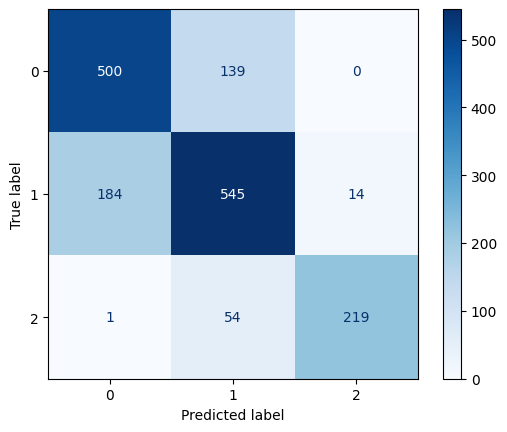

In [91]:
import sklearn
confMatrix = sklearn.metrics.confusion_matrix(test_labels, predicted_classes)
dispCM = sklearn.metrics.ConfusionMatrixDisplay(confMatrix, display_labels=test_ds.class_indices.keys())
dispCM.plot(cmap='Blues', values_format='d')

In [92]:
print(sklearn.metrics.classification_report(test_labels, predicted_classes, target_names=test_ds.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       639
           1       0.74      0.73      0.74       743
           2       0.94      0.80      0.86       274

    accuracy                           0.76      1656
   macro avg       0.80      0.77      0.79      1656
weighted avg       0.77      0.76      0.76      1656



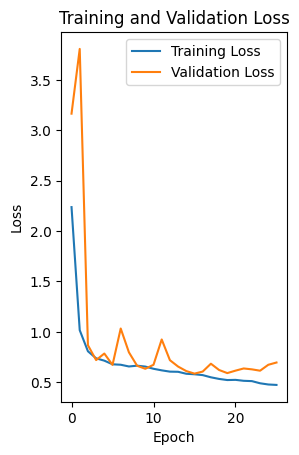

In [105]:
plt.subplot(1, 2, 1)
plt.plot(inceptionV3_new.history['loss'], label='Training Loss')
plt.plot(inceptionV3_new.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.xlim(-10,50)
plt.legend()

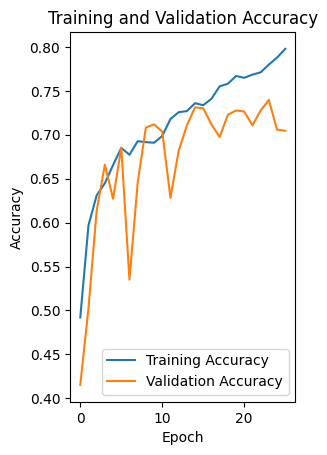

In [107]:
plt.subplot(1, 2, 2)
plt.plot(inceptionV3_new.history['accuracy'], label='Training Accuracy')
plt.plot(inceptionV3_new.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Accuracy Plot for Different Models

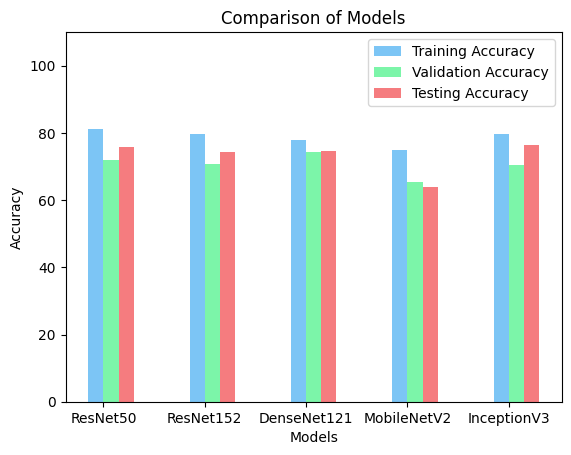

In [108]:
import matplotlib.pyplot as plt

models = ['ResNet50', 'ResNet152', 'DenseNet121', 'MobileNetV2', 'InceptionV3']

training = [81.05, 79.65, 77.99, 74.87, 79.77]
validation = [71.91, 70.70, 74.21, 65.38, 70.46]
testing = [75.72, 74.46, 74.64, 63.83, 76.33]

bar_width = 0.15

index = np.arange(len(models))

plt.bar(index, training, width=bar_width, label='Training Accuracy', color=(0.486, 0.773, 0.961))
plt.bar(index + bar_width, validation, width=bar_width, label='Validation Accuracy', color=(0.486, 0.961, 0.663))
plt.bar(index + bar_width*2, testing, width=bar_width, label='Testing Accuracy', color=(0.961, 0.486, 0.498))


plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models')
plt.xticks(index + bar_width / 2, models)
plt.legend(loc='upper right')
plt.ylim(0, 110)

plt.show()